In [378]:
import numpy as np
import math
import matplotlib
import matplotlib.pyplot as plt
from scipy import integrate
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
import seaborn
seaborn.set_style("whitegrid")

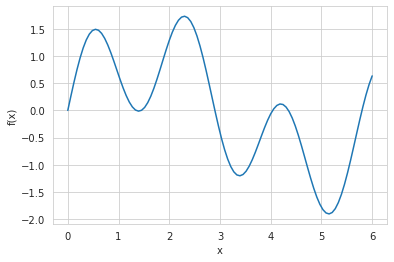

In [379]:
x=np.linspace(0,6,100)
y=np.sin(x)+np.sin(10/3*x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x,y)
plt.show()

In [617]:
def ptsampler(x0,x_bounds,n): 
        sd=(x_bounds[1]-x_bounds[0])/6.
        temp=np.random.normal(loc=x0, scale=sd, size=n)
        while(np.min(temp)<x_bounds[0] or np.max(temp)>x_bounds[1] ):
            temp= np.random.normal(loc=x0, scale=sd, size=n)
        return temp
def f(x):
    return np.sin(x)+np.sin(10/3*x)
def acceptprob(x,T):
    if(T>0):
        return math.exp(-x/T)
    else:
        return 1.
def acceptreject(x1,x2,T):
        t1=np.random.uniform(0,1)
        if(f(x2)<f(x1)):
            return True
        else:
            if(acceptprob(f(x2)-f(x1),T)>t1):
                return True
            else:
                return False


In [701]:
#sim anneal
x_bounds=np.array((0,6))
x0=6.
T0=1.
kmax=100
k=0
ak=0
lt=[]
T=[]
xj=x0
lt.append(xj)
T.append(T0)
while k<kmax and T0>1e-5:
    
    xk=ptsampler(xj,x_bounds,1)[0]
    if(acceptreject(xj,xk,T0)):
        xj=xk
    else:
        xk=xj
    if(xj!=lt[-1]):
        lt.append(xj)
        k+=1
    if((ak+1)%4==0):
        T0/=1.8
        T.append(T0)
    ak+=1
#plt.hist(lt)
#plt.scatter(x,lt.pdf(x))
#plt.show()

#while(k<kmax):


In [702]:
print(lt[-1],len(lt))

5.145830042654041 12


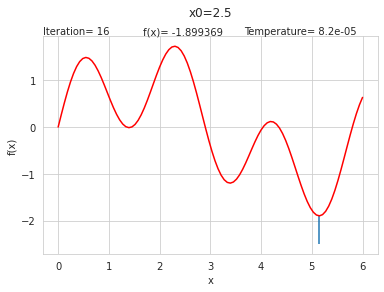

In [694]:
from matplotlib import pyplot as plt
from celluloid import Camera
from IPython.display import HTML
fig,ax = plt.subplots()
camera = Camera(fig)
x=np.linspace(0,6,100)
std=0
for i in range(len(lt)):
    plt.plot(x,f(x),c='r')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title("x0=2.5",pad=20.)
    plt.vlines(lt[i],-2.5,f(lt[i]))
    ax.text(0.6, 1.01, "Temperature= "+str(round(T[std],6)), transform=ax.transAxes)
    ax.text(0, 1.01, "Iteration= "+str(std), transform=ax.transAxes)
    ax.text(0.3, 1.01, "f(x)= "+str(round(f(lt[std]),6)), transform=ax.transAxes)
    camera.snap()
    std+=1
animation = camera.animate()
HTML(animation.to_html5_video())
animation.save('x25.gif', writer = 'imagemagick')

In [322]:
from scipy.optimize import basinhopping
out=basinhopping(f,1.5)


In [323]:
out

                        fun: -0.013520523655982108
 lowest_optimization_result:       fun: -0.013520523655982108
 hess_inv: array([[0.098992]])
      jac: array([8.94069672e-08])
  message: 'Optimization terminated successfully.'
     nfev: 12
      nit: 4
     njev: 6
   status: 0
  success: True
        x: array([1.39825837])
                    message: ['requested number of basinhopping iterations completed successfully']
      minimization_failures: 0
                       nfev: 1202
                        nit: 100
                       njev: 601
                          x: array([1.39825837])